# **Training a Model from Cloud Dataset**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [18]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
train_images[0].ndim

2

In [9]:
train_images[0].shape

(28, 28)

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
test_images.shape

(10000, 28, 28)

In [19]:
train_labels.shape

(60000,)

In [20]:
test_labels.shape

(10000,)

In [21]:
train_labels[0]

5

**Listing 2.2: The Network Architecture**

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()    # network is a variable, In 'tensorflow' model has two types 1) Sequential, 2) Functional API
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))


**Listing 2.3: The Compilation Step**

In [38]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

**Listing 2.4: Preparing the Image Data**

In [29]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255


In [34]:
train_images[0].shape

(784,)

In [30]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Listing 2.5: Preparing the Labels**

In [35]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [39]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.2585 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1049 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0695 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0493 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0370 - accuracy: 0.9888


In [40]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0658 - accuracy: 0.9802
test_acc: 0.9801999926567078


In [42]:
# This will predict the test images

network.predict(test_images)

array([[2.20820140e-09, 1.74808258e-11, 2.69251973e-06, ...,
        9.99982834e-01, 1.62050871e-08, 4.79801940e-07],
       [1.16127157e-10, 1.33246331e-07, 9.99999762e-01, ...,
        9.07209146e-17, 1.59838420e-09, 2.03621509e-17],
       [9.84066588e-08, 9.97816324e-01, 3.32422438e-04, ...,
        7.77475536e-04, 9.73190239e-04, 1.39114002e-06],
       ...,
       [1.08482857e-13, 3.16158710e-10, 2.68433525e-10, ...,
        5.87470277e-06, 2.63645597e-06, 1.24205308e-05],
       [3.47850637e-10, 2.38807628e-12, 1.60677548e-11, ...,
        1.15321017e-10, 4.26770057e-05, 2.73972026e-11],
       [1.59911476e-11, 1.27583689e-16, 8.04855661e-12, ...,
        7.10974839e-17, 1.14112048e-13, 8.27595066e-15]], dtype=float32)

In [43]:
# This will predict the single item of test images

network.predict(test_images)[0]

array([2.2082014e-09, 1.7480826e-11, 2.6925197e-06, 1.3921005e-05,
       7.8318450e-13, 4.8421555e-08, 3.5195659e-14, 9.9998283e-01,
       1.6205087e-08, 4.7980194e-07], dtype=float32)

In [44]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.ndim)

print(train_images.shape)

print(train_images.dtype)

3
(60000, 28, 28)
uint8


**Listing 2.6: Displaying the Digits**

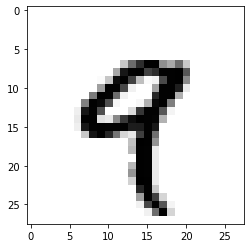

In [45]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [46]:
train_labels[4]

9

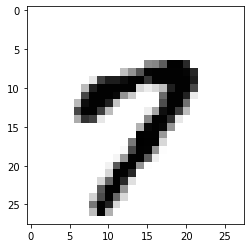

In [49]:
# Display the image at index-15

digit = train_images[15]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [48]:
train_labels[15]

7